In [54]:
import numpy as np
import matplotlib.pyplot as plt


"""
    Define a point with the heading direction and the distance to be covered:
         p[0]: x coordinate
         p[1]: y coordinate
         p[2]: [0;360] angle that describe the heading direction of the future segment
         p[3]: lenght of the future segment coming out of the point
"""

def next_point(sign, p, D = 85, R = 1.45, noise = False, noise_band = 5):
    
    if sign == "+" : alpha = p[2]+ D
    elif sign == "-" : alpha = p[2]- D #TO DO: raise exception!
    
    if noise: alpha = alpha + np.random.uniform((-1)*noise_band, noise_band)
    return np.array([p[0] + p[3]*np.sin((alpha)* np.pi/180),
                    p[1] + p[3]*np.cos((alpha)* np.pi/180),
                    alpha,
                    p[3]/R])

        
def ramificate(Sequence, vectors):
    for p in Sequence:
        
        S1 = next_point("+", p)
        vectors.append(((p[0], S1[0]),(p[1],S1[1]))) 
        #contains vectors' coordinates in plt friendly way [((x1,x2),(y1,y2)), ...]
        yield S1
        
        S2 = next_point("-", p)
        vectors.append(((p[0], S2[0]),(p[1],S2[1])))
        yield S2

## Drawing's Ramification

In [55]:
vectors = []
O = np.array([0,0,0,1])
p1 = np.array([0,-np.sqrt(2),0,1])
vectors.append(((O[0], p1[0]),(O[1],p1[1])))
Sequence = [p1]
rep = 13
for _ in range(rep):
    Sequence = [x for x in ramificate(Sequence, vectors)]
    
Sequence = np.stack([O] + Sequence) #Adding in head the first point
Sequence.shape


(8193, 4)

## Plotting Drawing

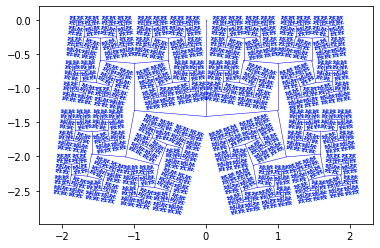

In [57]:
fig = plt.figure()
plt.scatter(Sequence[:,0],Sequence[:,1], marker = '.', s = 0.5)
for v in vectors:
    plt.plot(*v, 'b', lw = 0.5)
plt.show()
fig.savefig('ramification_{}_w\o_noise.png'.format(rep), dpi=1000)

## Computation of N.N.

In [52]:
from scipy.spatial import cKDTree

Points = Sequence[:,0:2]
Tree = cKDTree(Points)

p_3 = Points[3,:]
p_4 = Points[4,:]

Tree.query([p_3, p_4], k=[3])

(array([[0.4389575 ],
        [0.35004654]]), array([[2],
        [5]]))

In [48]:
Tree.data

array([[ 0.        ,  0.        ],
       [ 0.90417564, -1.8218378 ],
       [ 0.7184538 , -1.57221478],
       [ 0.33001523, -1.77666322],
       [ 0.4565576 , -2.06101067],
       [ 0.56670026, -2.39327739],
       [ 0.70895781, -2.66921188],
       [ 1.11523686, -2.54719753],
       [ 1.05842239, -2.24052827],
       [ 1.46960814, -2.1081571 ],
       [ 1.61021751, -2.38542834],
       [ 2.01665823, -2.24870151],
       [ 1.95772192, -1.94322092],
       [ 1.851368  , -1.58747999],
       [ 1.77327276, -1.28860182],
       [ 1.32326914, -1.37208407],
       [ 1.35417664, -1.68197319],
       [ 1.17411879, -0.73647776],
       [ 1.27831825, -1.03015195],
       [ 1.70842549, -0.90803993],
       [ 1.6555269 , -0.60193038],
       [ 1.57048735, -0.25685198],
       [ 1.50678255,  0.04683474],
       [ 1.04851902, -0.02036845],
       [ 1.08317116, -0.3296866 ],
       [ 0.61739599, -0.37885463],
       [ 0.52501537, -0.08107666],
       [ 0.08032422, -0.20804676],
       [ 0.16435322,